In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import binascii
import numpy as np
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
PATH = os.getenv('AGI_DATA_HOME') + '/svhn/' # Path to dataset

In [4]:
# Load the train/test data
train_data = sio.loadmat(PATH + 'src/train_32x32.mat')
test_data = sio.loadmat(PATH + 'src/test_32x32.mat')

In [5]:
# Split features/labels
X_train = train_data['X']
y_train = train_data['y']

X_test = test_data['X']
y_test = test_data['y']

In [6]:
# Data dimensions
print('X_train: {0}'.format(X_train.shape))
print('y_train: {0}'.format(y_train.shape))
print('X_test: {0}'.format(X_test.shape))
print('y_test: {0}'.format(y_test.shape))

X_train: (32, 32, 3, 73257)
y_train: (73257, 1)
X_test: (32, 32, 3, 26032)
y_test: (26032, 1)


In [24]:
y_train_count = np.bincount(y_train.ravel())
y_train_labels = np.nonzero(y_train_count)[0]
y_train_freq = np.vstack((y_train_labels, y_train_count[y_train_labels])).T
print(y_train_freq)

[[    1 13861]
 [    2 10585]
 [    3  8497]
 [    4  7458]
 [    5  6882]
 [    6  5727]
 [    7  5595]
 [    8  5045]
 [    9  4659]
 [   10  4948]]


In [25]:
y_test_count = np.bincount(y_test.ravel())
y_test_labels = np.nonzero(y_test_count)[0]
y_test_freq = np.vstack((y_test_labels, y_test_count[y_test_labels])).T
print(y_test_freq)

[[   1 5099]
 [   2 4149]
 [   3 2882]
 [   4 2523]
 [   5 2384]
 [   6 1977]
 [   7 2019]
 [   8 1660]
 [   9 1595]
 [  10 1744]]


Label: [1]


<module 'matplotlib.pyplot' from '/Users/Abdel/Developer/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

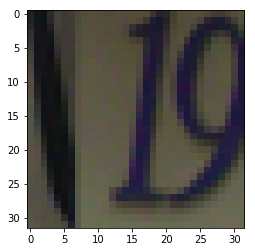

In [18]:
# Show sample image
image_index = 0

plt.imshow(X_train[:, :, :, image_index])
print('Label: {0}'.format(y_train[image_index]))
plt

## Preprocessing

In [46]:
# Path to training/test data
train_path = PATH + 'training/'
test_path = PATH + 'testing/'

train_count = int(X_train.shape[3])
test_count = int(X_test.shape[3])

In [47]:
def preprocess(X, y, num_data, target_path, data_type, num_labels=10, num_random=6, display_step=1000):
    # Initialise label count
    label_count = {}
    for i in range(num_labels):
        label_count[i] = 0
    
    for i in range(num_data):
        label = y[i][0]
        random = binascii.hexlify(os.urandom(num_random // 2)).decode()

        count = 0
        if label in label_count:
            count = label_count[label]
            count += 1
        label_count[label] = count

        filename = '%s_%s_%i_%i.png' % (data_type, random, label, label_count[label])
        image = Image.fromarray(X_train[:, :, :, i])
#         image = image.convert('LA') # grayscale
        image.save(target_path + filename)

        if i % display_step == 0 or i == 1:
            print('Step #%i: saved %s' % (i, filename))

In [42]:
preprocess(X_train, y_train, 1, train_path, 'train')

Step #0: saved train_9212a6_1_1.png


In [45]:
preprocess(X_test, y_test, 1, test_path, 'test')

Step #0: saved test_a334e6_5_1.png
